# CITY TEMPERATURE DATA EXPLANATORY ANALYSIS

### by Smith Iduhon

## Preliminary Wrangling

**Structure of dataset** 


There are 2,906,327 observations with 8 unique features explaining the average temperature in terms of regions, countries and countries given over time. The dataset includes region, country, state, city, month, day, year and average temerature. Aside Avgtemperature, the rest datasets are all categorical data. This dataset is particularly important in terms of understanding the trend of weather over time as well as the effect of Global warming on our day-to-day operation.  This would also be important in geting a sense of how real climate change is in our daily life

Also weather information is helpful for a lot of data science tasks like sales forecasting, logistics etc.




[Source of the data](https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities?datasetId=694560)



**Research Questions**

1. Identifying patterns of city temperatures across the world?

2. Determine trends and seasonal components

2. To what extent can we forcast future weather condition?


3. Countries suffering the most from change of weather condtion?


4. List of the top hottest cities in the world

## Reading and Accessing data

In [23]:
# import all packages and libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import datetime as dt 
from scipy import stats
import prophet 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [24]:
# load in the temperature dataset into a pandas dataframe
temps_df = pd.read_csv('city_temperature.csv')

In [25]:
# this returns the first fIVE lines in our dataframe
temps_df.head(5)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [26]:
#this returns the last five lines in our dataframe
temps_df.tail(2)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8
2906326,North America,US,Additional Territories,San Juan Puerto Rico,7,31,2013,83.6


In [27]:
# display random rows to get better understanding of the dataset and errors present
temps_df.sample(2)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
651846,Europe,Belgium,NaN,Brussels,11,4,1996,54.8
84637,Africa,Guinea,NaN,Conakry,4,6,2013,81.2


It should be noted certain observations contains empty values for the State colum. Also, we've seen different dataset from 1995 to 2019

In [28]:
# This returns a tuple of the dimensions of the dataframe
temps_df.shape

(2906327, 8)

In [29]:
# display information about the original dataset
temps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [30]:
# this returns the datatypes of the columns
temps_df.dtypes

Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

The variables within the dataset include data types that are integers & object(categorical). Also, Day, Month and Year should be datetime

In [31]:
# see number of duplicated data entries
sum(temps_df.duplicated()) 

20715

In [32]:
# see number of null values on each columns
temps_df.isnull().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [33]:
# list of colums
temps_df.columns

Index(['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'],
      dtype='object')

In [34]:
# checking for duplicates
print('the duplicated values are : {}'.format(len(temps_df[temps_df.duplicated()])))

the duplicated values are : 20715


In [35]:
temps_df.count()

Region            2906327
Country           2906327
State             1455337
City              2906327
Month             2906327
Day               2906327
Year              2906327
AvgTemperature    2906327
dtype: int64

In [36]:
# Descriptive data 
temps_df[["AvgTemperature","Year","Month", "Day"]].describe().T

,count,mean,std,min,25%,50%,75%,max
AvgTemperature,2906327.0,56.004921,32.123594,-99.0,45.8,62.5,75.5,110.0
Year,2906327.0,2006.623909,23.382259,200.0,2001.0,2007.0,2013.0,2020.0
Month,2906327.0,6.469163,3.456489,1.0,3.0,6.0,9.0,12.0
Day,2906327.0,15.716816,8.800534,0.0,8.0,16.0,23.0,31.0


From the above descrption, certain outliers values are found. This include the 0.0 minimum values found in Day and 200.0 for minimum value of year appears to be the minimum which seems like year 2000. To get a better view of the data, I make use of boxplots to show case the level of outliers found in the data. 

## Data Cleaning

## Removing Outliers

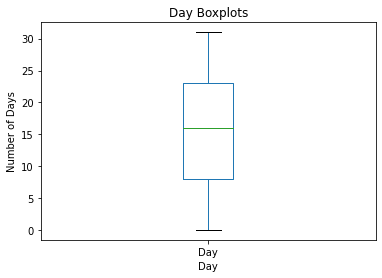

In [37]:
# Display boxplot to show outlier
temps_df.Day.plot(kind = 'box')
plt.xlabel('Day')
plt.ylabel('Number of Days')
plt.title('Day Boxplots')
plt.grid(False)

The presence of Day 0 is absolutely an error

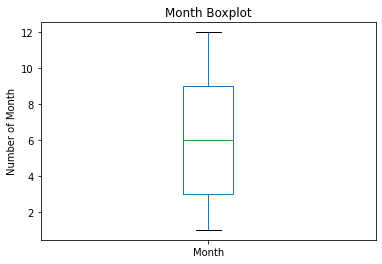

In [38]:
#Display boxplot to show outlier
temps_df.Month.plot(kind = 'box')
plt.ylabel('Number of Month')
plt.title('Month Boxplot')
plt.grid(False)

The range of months is okay as months begin from 1 and end in 12. Instead of mere numbers, appropriate month names would be prefered 

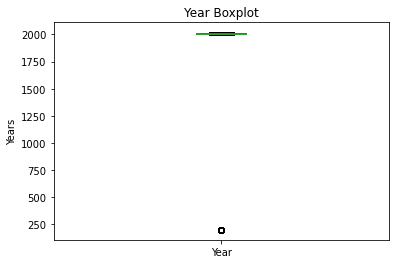

In [39]:
# Display boxplot to show outlier
temps_df.Year.plot(kind = 'box')
plt.ylabel('Years')
plt.title('Year Boxplot')
plt.grid(False)

Certain year values was entered in error such as 250. Best we remove such dataset

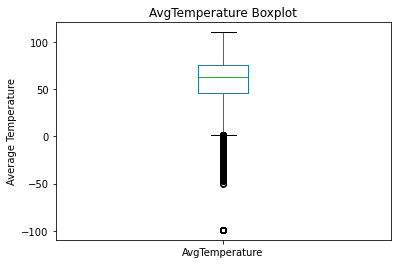

In [40]:
# Display boxplot to show outlier
temps_df.AvgTemperature.plot(kind = 'box')
plt.ylabel('Average Temperature')
plt.title('AvgTemperature Boxplot')
plt.grid(False)

Rare weather conditions appears such as the one around -100

Outliers are present and can be seen in the figure above. Day can not be 0 and 200.0 for minimum value of year appears to be the minimum which seems like year 2000. Average temperature below -50 looks rare but has still happened before

In [41]:
# Identify the row index of 0 value for Day and then drop it
temps_df.query('Day == 0')

,Region,Country,State,City,Month,Day,Year,AvgTemperature
82774,Africa,Guinea,NaN,Conakry,3,0,2008,-99.0
85697,Africa,Guinea,NaN,Conakry,3,0,2016,-99.0
92041,Africa,Guinea-Bissau,NaN,Bissau,3,0,2008,-99.0
146077,Africa,Malawi,NaN,Lilongwe,3,0,2012,-99.0
177862,Africa,Nigeria,NaN,Lagos,3,0,2008,-99.0
241159,Africa,Uganda,NaN,Kampala,3,0,2012,-99.0
1209901,North America,Mexico,NaN,Guadalajara,3,0,2012,-99.0
1333910,South/Central America & Carribean,Cuba,NaN,Havana,3,0,2008,-99.0


There are several rows with Day=0. We are going to drop such rows. 

### Remove Rows with Day=0

In [42]:
# List of rows with Day=0
zeroDay_col = [82774, 85697, 92041, 146077, 177862, 241159, 1209901, 1333910]

In [43]:
# There are several rows with Day=0. We are going to drop such rows
temps_df.drop(index=zeroDay_col, inplace=True)


### Confirm to see if Day=0 have been removed

In [44]:
#Confirm that the error has been eliminated off the dataset
temps_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,2906319.0,6.469173,3.456489,1.0,3.0,6.0,9.0,12.0
Day,2906319.0,15.716859,8.800507,1.0,8.0,16.0,23.0,31.0
Year,2906319.0,2006.623899,23.382290,200.0,2001.0,2007.0,2013.0,2020.0
AvgTemperature,2906319.0,56.005347,32.122609,-99.0,45.8,62.5,75.5,110.0


**Observation** 

It could be observed that Obseevations with 0 day have been removed

### Remove the outliers in the Year Columns

In [45]:
# A better view of the year column and the outlier found

temps_df['Year'].value_counts().sort_index(False)

200         89
201        351
1995    118616
1996    118951
1997    118656
1998    119082
1999    119355
2000    119682
2001    119355
2002    119355
2003    119140
2004    118645
2005    117895
2006    117647
2007    115428
2008    114904
2009    114247
2010    115627
2011    113740
2012    111990
2013    111021
2014    109018
2015    107498
2016    107236
2017    106946
2018    106698
2019    106337
2020     38810
Name: Year, dtype: int64

From the dataset, several outliers was found such as years 200, 201 & 2020(Looks incomplete). Best we strip all three from our dataset


In [46]:
# Exclude year 200, 201 and 2020

temps_df = temps_df[(temps_df.Year!=200) & (temps_df.Year!=201) & (temps_df.Year!=2020)]

In [47]:
# Confirm that dataset with year 200, 201 and 2020 have been removed
temps_df['Year'].value_counts().sort_index(False)

1995    118616
1996    118951
1997    118656
1998    119082
1999    119355
2000    119682
2001    119355
2002    119355
2003    119140
2004    118645
2005    117895
2006    117647
2007    115428
2008    114904
2009    114247
2010    115627
2011    113740
2012    111990
2013    111021
2014    109018
2015    107498
2016    107236
2017    106946
2018    106698
2019    106337
Name: Year, dtype: int64

The dataset for analysis range from 1995 to 2019 which is a 25 year time period 

## Remove Duplicated Rows 

In [48]:
# see number of duplicated data entries
sum(temps_df.duplicated()) 

20302

We will drop all rows, belonging to these years. Also we will drop more than 20 thousand duplicate rows.

In [49]:
# Dropping the duplicate rows
temps_df = temps_df.drop_duplicates()
temps_df.shape

(2846767, 8)

In [50]:
#temps_df['AvgTemperature'] = lambda f: 5 / 9 * (f - 32)
#temps = [(f, c(f)) for f in temps_df['AvgTemperature']]

In [51]:
#temps_df['AvgTemperature'] = (temps_df['AvgTemperature'] -32)*(5/9)

In [52]:
temps_df.AvgTemperature.value_counts()

-99.0    78872
 80.2     7343
 80.8     7292
 79.2     7162
 81.1     7134
         ...  
-38.5        1
-43.5        1
-38.7        1
-34.4        1
-46.2        1
Name: AvgTemperature, Length: 1515, dtype: int64

In [53]:
#temps_df.AvgTemperature.value_counts()

### What is the structure of your dataset?


There are 2,885,612 loans with 8 unique features explaining the average temperature in terms of regions, countries and countries given over time. The dataset includes region, country, state, city, month, day, year and average temerature. Aside Avgtemperature, the rest datasets are all categorical data


### What is/are the main feature(s) of interest in your dataset?

The main aim of this study is to understad the trend of AvgTemperature over time in Nigeria and across the world

The research questions include the following: 

**Research Questions**

1. Is the average temperature of the world changing?


2. To what extent can we forcast future weather condition?


3. Countries suffering the most from change of weather condtion?


4. List of the top hottest cities in the world

The main feature for this dataset is AvgTemperature and its effect across the world in terms of region, countries

###  What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Region	Country	State	City	Month	Day	Year	AvgTemperature

- Region 

- Country

- State 

- City 

- Month 

- Day 

- Year 

- AvgTemperature 



## Univariate Exploration

I would basically be investigating the distribution of individual variables

**Question**

How is AvgTmperature distributed?

### AvgTemperature

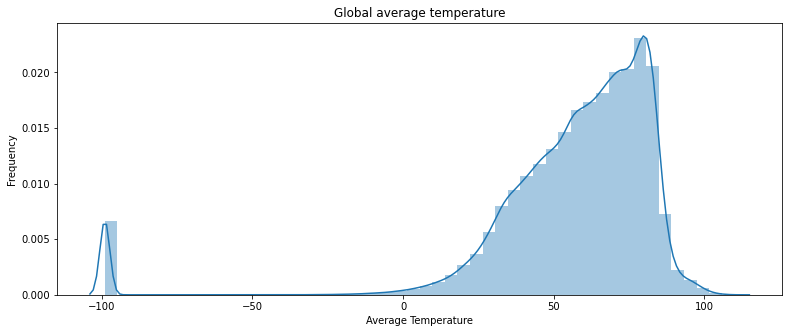

In [54]:
# start with a standard-scaled plot
plt.figure(figsize = [13,5])
sb.distplot(temps_df['AvgTemperature'])
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.title('Global average temperature');


Due to the outliers contained in the datatset, its best to reduce the distribution from o and above. This is important to remove outliers from the dataset

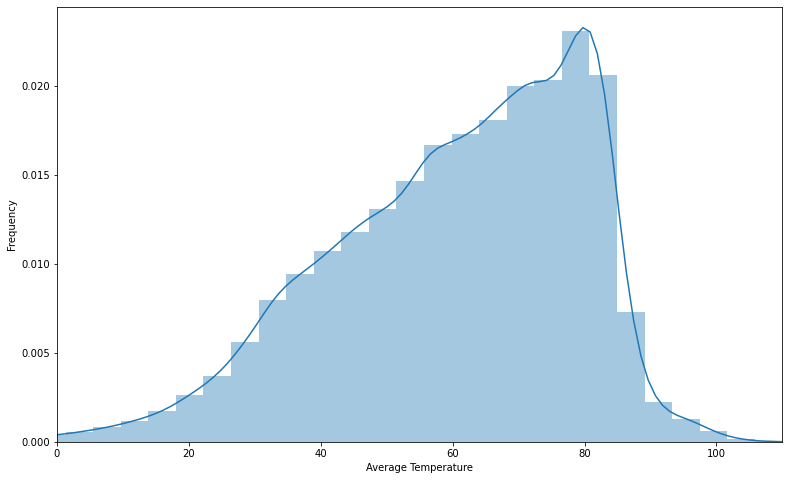

In [55]:
# plotting
plt.figure(figsize = [13,8])
sb.distplot(temps_df['AvgTemperature'])
plt.xlim(0, temps_df['AvgTemperature'].max())
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.grid(False);

The Average Temperature appears to be Negatively Skewed with a modal value at 80 degrees. This is generally considered very hot. 

## How are the observation spread across region?

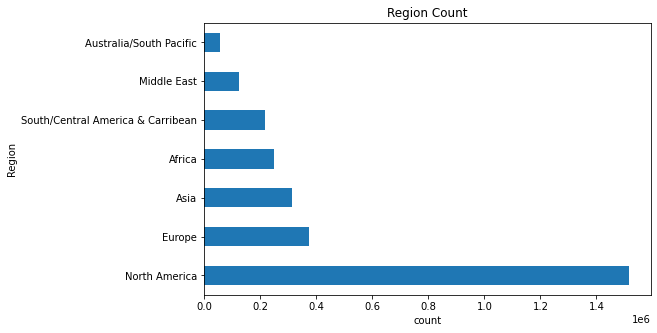

In [56]:
# Univariate Region
plt.figure(figsize=[8, 5])
temps_df['Region'].value_counts().plot(kind='barh')
plt.title('Region Count')
plt.xlabel('count')
plt.ylabel('Region')
plt.grid(False);

**Observation**

North America appears to be the region with the highest counts of observation. This could be attributed to a larger sample taken from the region

## How are the observation spread across Country?

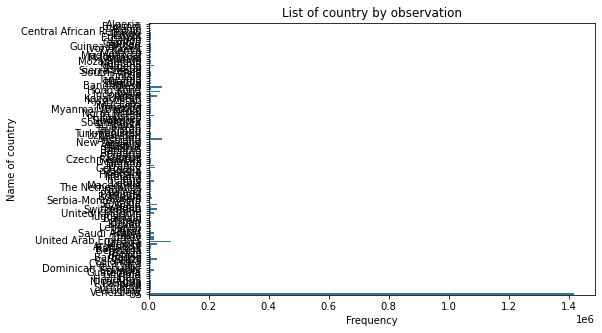

In [57]:
# Spread of the country
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
# Plot the bar charts 
sb.countplot(data=temps_df, y='Country', color=base_color)
plt.title('List of country by observation')
plt.xlabel('Frequency')
plt.ylabel('Name of country');

Due to the large dataset, the observations are quite crowded. Best we reduce the samples into s more readable fashion

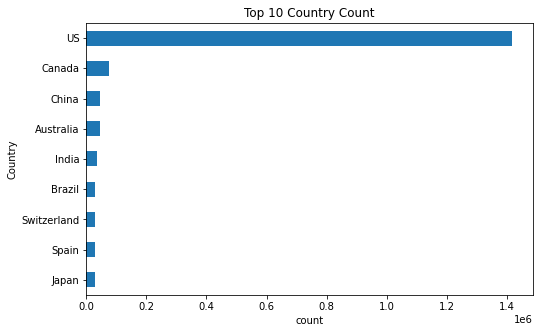

In [58]:
# see the top 10 country of observations
plt.figure(figsize=[8, 5])
temps_df['Country'].value_counts()[8::-1].plot(kind='barh')
plt.title('Top 10 Country Count')
plt.xlabel('count')
plt.ylabel('Country')
plt.grid(False)
plt.fontsize = 15

**Observation**

United State of America appears to be the country with the highest count with a far margin. This shows that majority of the North America counts comes from the US. The next is Canada also in North America. China and India with the highest number of population appears to be distant 4 and 5. No African country made it to the top 10 country.

## Which City has the highest number of Count?

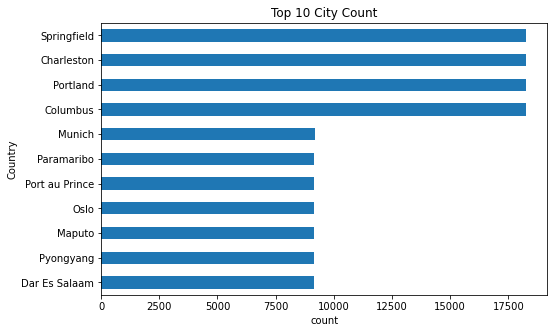

In [59]:
# see the top city 
plt.figure(figsize=[8, 5])
temps_df['City'].value_counts()[10::-1].plot(kind='barh')
plt.title('Top 10 City Count')
plt.xlabel('count')
plt.ylabel('Country')
plt.grid(False);

**Observation**

The top 4 cities which is Columbus, Portland, Charleston & Springfield are all found in the US. This is not suprising in anyway as the US has the highest count. The next top 5 to 10 are all same counts with Munich being the 5th highest 

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The AvgTemperaure variable took on a negative skewed distrbution, so I used xlim to reduce the dataset. The Average Temperature appears to be Negatively Skewed with a modal value at 80 degrees. This is generally considered very hot. 

North America appears to be the region with the highest counts of observation. This could be attributed to a larger sample taken from the region. 

## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The 2020 dataset was incomplete so it was deleted. Also, dataset entered incorrectly was deleted

## Bivariate Exploration

To get a better view of the dataset, we would have to go beyond just mere frequnecy counts. To do this, we would have to use the groupby method

## How many countries are found in each region? 

In [60]:
# Counts of country by region
temps_df.groupby(['Region'])['Country'].nunique()

Region
Africa                               28
Asia                                 25
Australia/South Pacific               2
Europe                               34
Middle East                          11
North America                         3
South/Central America & Carribean    22
Name: Country, dtype: int64

**Observation**

Europe has the highest number of country in the datatset with 34 country, with Africa being second and Asia being third. North America appears to be just 3 countries despite being the highest count. Those 3 countries would be US, Canada and Mexico. Austrialia/South Pacific is the least 

## What is the mean Average Temperature across Region?

In [61]:
# Counts of country by region
temps_df.groupby(['Region'])['AvgTemperature'].mean().sort_values()

Region
Europe                               46.919342
Africa                               53.348367
North America                        55.376745
Australia/South Pacific              61.079130
South/Central America & Carribean    62.064703
Asia                                 62.581133
Middle East                          68.450026
Name: AvgTemperature, dtype: float64

This is best illustrated using visuals

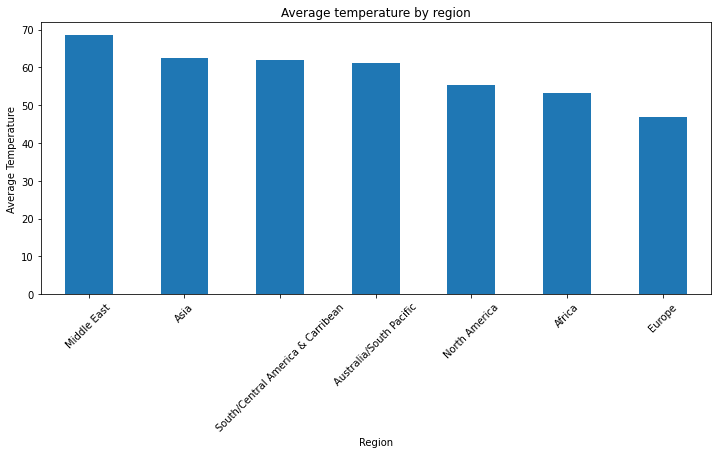

In [62]:
# Mean temperature across regions
plt.figure(figsize=[12, 5])
temps_df.groupby(['Region'])['AvgTemperature'].mean().sort_values()[-1::-1].plot(kind='bar')
plt.title('Average temperature by region')
plt.xlabel('Region')
plt.ylabel('Average Temperature')
plt.xticks(rotation = 45)
plt.grid(False);

The Middle East region appears to have the highest average temperature. The harsh weather condition can be attributed to the hih levels of humidity in the region and it also its vulnerability to the rising global temperatures. Perphaps, with more rising temperature levels, the Middle East might become inhabitable for humans over time

## List of top cities with the average temperature?

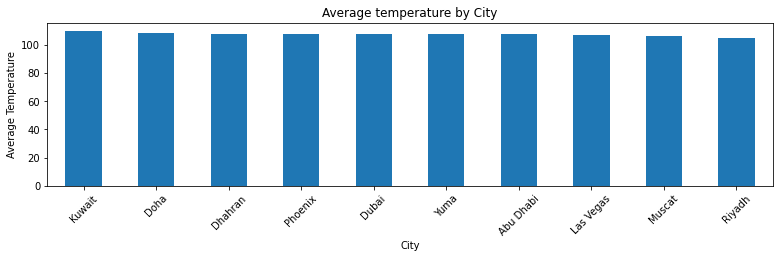

In [63]:
# Max temperature across city
plt.figure(figsize=[13, 3])
temps_df.groupby(['City'])['AvgTemperature'].max().sort_values()[-1:-11:-1].plot(kind='bar')
plt.title('Average temperature by City')
plt.xlabel('City')
plt.ylabel('Average Temperature')
plt.xticks(rotation = 45)
plt.grid(False);


**Obseravtion**

The city that ever experienced the highest recorded average temperature ever is Kuwait with 110F. Kuwait is located in the Middle East Region bordering Iraq to the North and Saudi to the South. The second & third hottest city are Doha and Dhahran respectively which goes on to show how hot the Middle East region is. Aside Phoenix, Yuma and Las Vegas in US, the rest of the top ten are all found in the Middle East. This shows that Phoenix, Yuma and Las Vegas are the sunniest cities in the US. This shows that more likely than not, your visit to any of this country would be a warm one. 

Next, we consider the unique nature of Nigeria and the effect of rising temperature in nigeria.

## What is the highest average temperature ever experienced in Nigeria?

In [64]:
temps_df[temps_df['Country']=='Nigeria'].groupby('Country')['AvgTemperature'].max()

Country
Nigeria    102.8
Name: AvgTemperature, dtype: float64

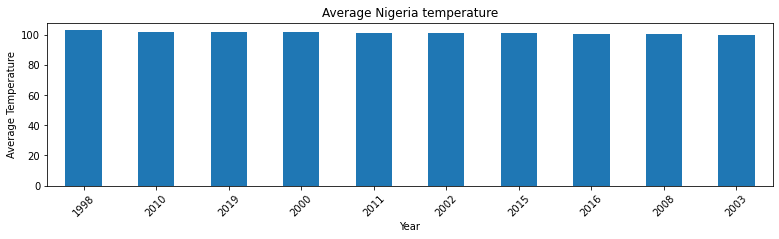

In [65]:
# Max temperature across city
plt.figure(figsize=[13, 3])
temps_df[temps_df['Country']=='Nigeria'].groupby('Year')['AvgTemperature'].max().sort_values()[-1:-11:-1].plot(kind='bar')
plt.title('Average Nigeria temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.xticks(rotation = 45)
plt.grid(False);


**Observation** 

From the visuals, we can see that the hottest year in Nigeria is 1998. All top 10 hottest year in Nigeria are all above 100F. While majority of the world experience it hottest temperature in 2016, Nigeria experience its highest in 1998. This could be due to the fact that the maximum values was used, perphaps the mean values would be more revealing

## What is the hottest month in Nigeria?

In [66]:
temps_df[temps_df['Country']=='Nigeria'].groupby('Month')['AvgTemperature'].max().sort_values()[-1:-11:-1]

Month
4     102.8
5     101.8
3     100.7
6      99.2
10     95.3
7      94.5
9      93.7
2      93.7
12     93.2
1      92.9
Name: AvgTemperature, dtype: float64

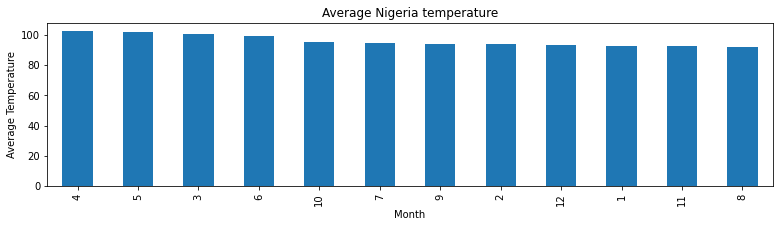

In [67]:
# Max temperature across city
plt.figure(figsize=[13, 3])
temps_df[temps_df['Country']=='Nigeria'].groupby('Month')['AvgTemperature'].max().sort_values()[-1:-13:-1].plot(kind='bar')
plt.title('Average Nigeria temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.grid(False);


**Observation**

The months April, May and March are the warmest months in Nigeria with the average weather each above 100F.

The month of August which is mostly accompanied with constant rain is the coolest month. Next coolest are the annual Harmattan season of November, January, December. 




## Spread of Average Temperature over years?

<AxesSubplot:title={'center':'Average Global temperature'}, xlabel='Year', ylabel='AvgTemperature'>

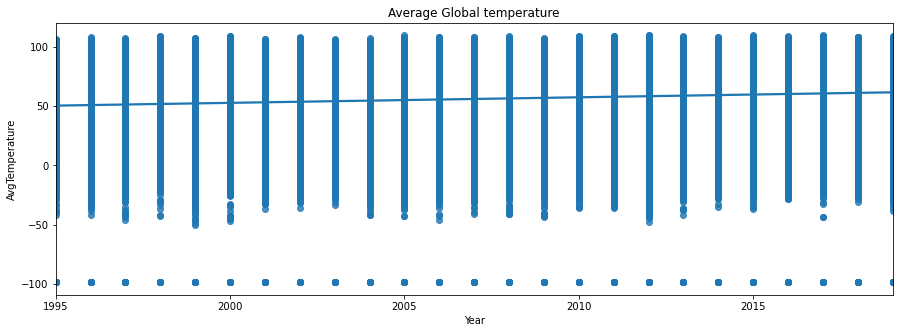

In [68]:
# spread of average temperature over years
plt.figure(figsize = (15,5))
plt.title('Average Global temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.grid(False);
sb.regplot(x=temps_df.Year, y=temps_df.AvgTemperature)

**Observation**

The above regplot shows a constant slight rise in Average Temperature

## Violin Plot of Average Temperature across Region

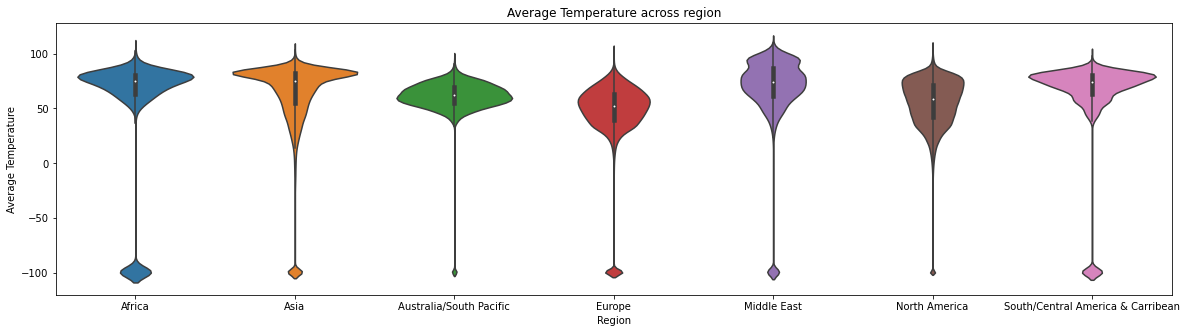

In [69]:
# Violin Plot of Average Temperature across Region
plt.figure(figsize = [20, 5])
sb.violinplot(data=temps_df, x='Region', y='AvgTemperature')
plt.xlabel('Region')
plt.ylabel('Average Temperature')
plt.title('Average Temperature across region');

The violin plot doesn't seem to potray a good representation of the relationship between Region and Average Temperature

## Overview of Average Temperature across Region

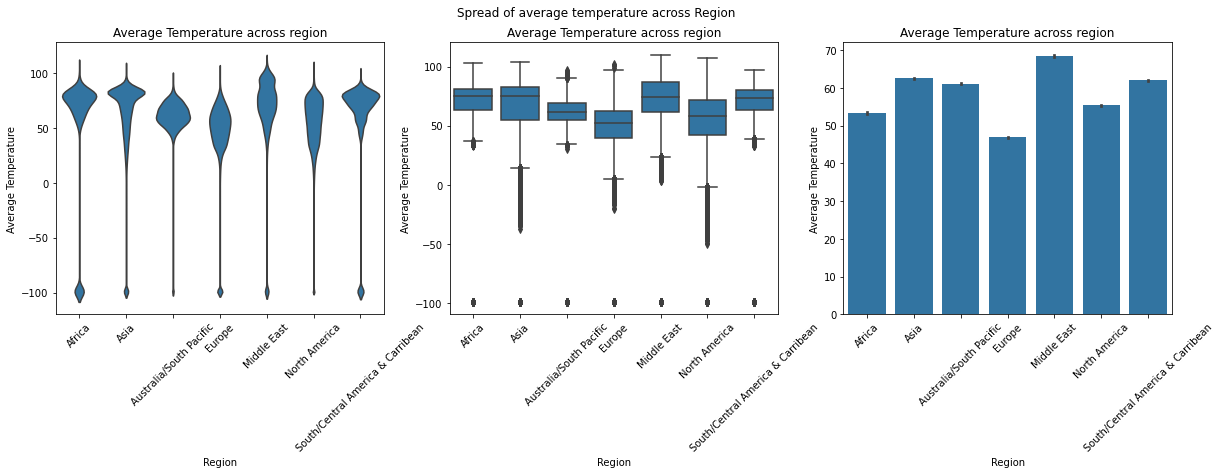

In [70]:
# Spread of average temperature across Region
plt.figure(figsize = [20, 5])
plt.suptitle('Spread of average temperature across Region')
base_color = sb.color_palette()[0]

plt.subplot(1, 3, 1)
sb.violinplot(data=temps_df, x='Region', y='AvgTemperature', inner = None, color = base_color)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Average Temperature')
plt.title('Average Temperature across region');

plt.subplot(1, 3, 2)
sb.boxplot(data=temps_df, x='Region', y='AvgTemperature', color = base_color)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Average Temperature')
plt.title('Average Temperature across region');

plt.subplot(1, 3, 3)
sb.barplot(data=temps_df, x='Region', y='AvgTemperature',  color = base_color)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Average Temperature')
plt.title('Average Temperature across region');

**Observation** 

From the graphs above, we could see that Middle East has the highest average temperature across all charts 

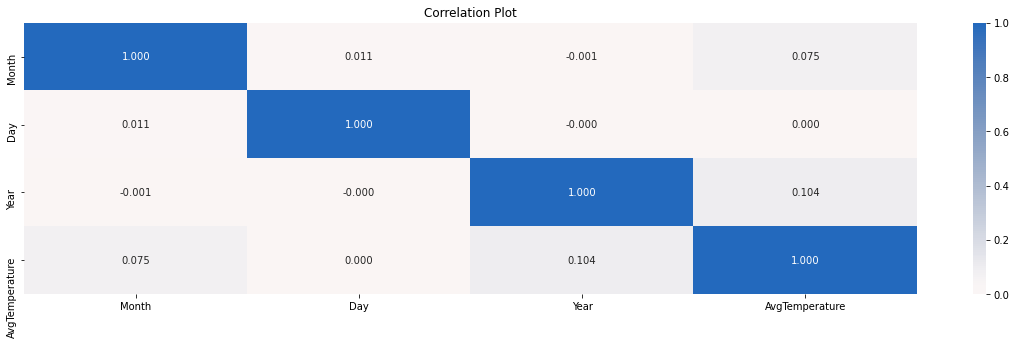

In [71]:
# Relationship between Time and AvgTemperature
plt.figure(figsize = [20, 5])
# correlation plot
sb.heatmap(temps_df.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show();

**Observation**

There seems to exist a positive relationship between Year and Avg Temperature albeit a week one. This means that over time, average temperature would continue to increase. This seems to be threat to our present environment as a continous rise in temperature is a strong sign of global warming

## Spread of Average Temperature over months and Years

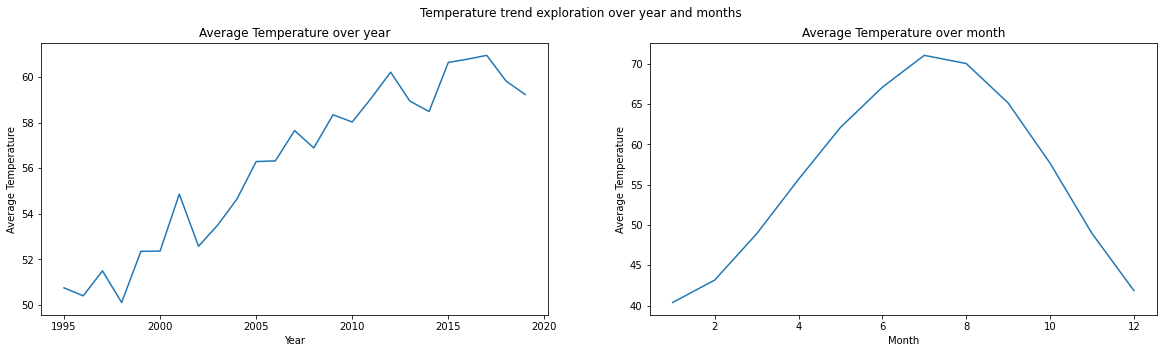

In [72]:
# plots the lineplot for year & Month v AvgTemperature
plt.figure(figsize = [20, 5])
plt.suptitle('Temperature trend exploration over year and months')

plt.subplot(1, 2, 1)
sb.lineplot(data=temps_df, x='Year', y='AvgTemperature', ci=None)
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temperature over year')
plt.grid(False);

plt.subplot(1, 2, 2)
sb.lineplot(data=temps_df, x='Month', y='AvgTemperature', ci=None)
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title('Average Temperature over month')
plt.grid(False);

**Observation**

The AvgTemperature shows an upward trend. Also, it was observed that Average Temperature was lowest between 1995 and 2000. This is signifies that temperature would continue to accelerate over time. 

The second charts shows that Average Temperature follows a normal distribution with the peak around the middle of the year. This period are mostly refered to as Summer across the Northern Hemisphere

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The Average Temperature shows an upward trend when ploted over time. Also, it was observed that Average Temperature was lowest between 1995 and 2000. This signifies that temperature would continue to accelerate over time. 



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The city that ever experienced the highest recorded average temperature ever is Kuwait with 110F.
This shows that Phoenix, Yuma and Las Vegas are the sunniest cities in the US.

The months April, May and March are the warmest months in Nigeria with the average weather each above 100F.

The month of August which is mostly accompanied with constant rain is the coolest month. Next coolest are the annual Harmattan season of November, January, December.

## Multivariate Exploration

<Figure size 1440x576 with 0 Axes>

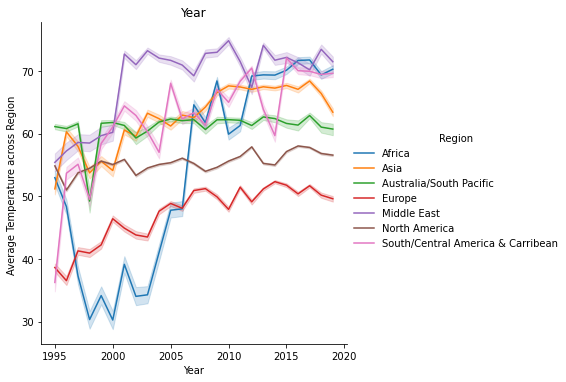

In [73]:
# plotting of scatter plot of AvgTemperature  and Year

plt.figure(figsize = [20,8])
sb.relplot(data=temps_df, x='Year',y='AvgTemperature',kind='line',hue='Region')
plt.xlabel('Year')
plt.ylabel('Average Temperature across Region ')
plt.title('Year');

In [54]:
#height=6, aspect=1

All the region charts shows that the temperature across all regions has been increasing continously over time with Middle East continously being hottest. Europe still remains the coolest

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


-  It shows that average temperature is highest during the summer (June, July) 
- All the region charts shows that the temperature across all regions has been increasing continously over time with Middle East continously being hottest. Europe still remains the coolest

### Were there any interesting or surprising interactions between features?


There was no suprsing interaction